# Clustering Analysis (Unsupervised Learning)

In this third question, we want to understand whether we can use unsupervised learning to identify potential groups of households that experience different level of transportation security. Instead of relying on existing knowledge about potential factors that might contribute to transportation insecurity and designing a insecurity metrics, we are going to look at unsupervised learning to explore the resulted clusters. Here are the steps I will take in this analysis: \
1. Data Preprocessing: Preprocess the data into appropriate formats. Delete the load and insecurity metrics that are calculated in the supervised learning steps. 
2. Apply PCA: Since the originally data will have over 70 columns after basic cleaning, we will use PCA to reduce the dimensionality of your data while preserving the variance. 
3. Choose the Number of Principal Components:
Decide on the number of principal components to retain based on the amount of variance you want to preserve. You can use techniques like the explained variance ratio to make this decision.
4. Fit PCA to the Data: Fit PCA to your preprocessed data and transform the data into the reduced feature space.
5. Choose the Number of Clusters: use techniques like the elbow method or silhouette score to decide number of clusters used. 
6. Apply KMeans Clustering: Use KMeans clustering on previously generated PCA data. 
7. Evaluate Clustering Results: Evaluate the clustering results to understand the characteristics of each cluster. Focus on the commute-related features. 
8. Assign Labels to Clusters:
Based on the characteristics of each cluster, assign labels representing different levels of transportation insecurity.
9. Visualize Results:
Visualize the clusters and their characteristics to gain insights into different commuting security levels among households.
10. Interpret Results and Refine Model:


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA


%matplotlib inline

In [50]:
# Import the data; delete the added "load" and "INSECURITY" columns
original_df = pd.read_csv("C:/Users/Lydia/Documents/ML with Python/Group Project/occupied_features_cleaned.csv")
original_df.head()

,Unnamed: 0,YRBUILT,UNITSIZE,RMJOB,RMOWNHH,RMFAMILY,RMCHANGE,RMCOMMUTE,RMHOME,RMCOSTS,...,COMTYPE_Multimode,COMTYPE_Ptall,BUS_YES,SUBWAY_YES,VAN_Yes,SUBSIDY_None,SUBSIDY_NotReported,SUBSIDY_Partial,GARAGE_NoGarage,GARAGE_NotReported
0,1,1960,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,3,1970,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
2,4,1980,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,6,1980,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,...,0,0,0,0,0,0,1,0,1,0
4,7,1950,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


We will focus on a selected list of features to perform the unsupervised learning. Those features are suspected to be related to transportation insecurity. They are: 'NUMPEOPLE', 'MARKETVAL', 'RATINGNH', 'TOTHCAMT' 'COMDAYS', 'DRIVEALL', 'DIST', 'load', 'HHGRAD_noHS', 'NRATE_WORSE_NH', 'SUBSIDY_None', 'BUS_YES', 'SUBWAY_YES', 'VAN_Yes', 'DISHH_2.0'

In [51]:
df = original_df.loc[:, ['NUMPEOPLE', 'MARKETVAL', 'RATINGNH', 'TOTHCAMT', 'COMDAYS', 'DRIVEALL', 'DIST', 'load', 'HHGRAD_noHS', 'NRATE_WORSE_NH', 'SUBSIDY_None', 'BUS_YES', 'SUBWAY_YES', 'VAN_Yes', 'DISHH_2.0']]

In [52]:
df.head()

,NUMPEOPLE,MARKETVAL,RATINGNH,TOTHCAMT,COMDAYS,DRIVEALL,DIST,load,HHGRAD_noHS,NRATE_WORSE_NH,SUBSIDY_None,BUS_YES,SUBWAY_YES,VAN_Yes,DISHH_2.0
0,4,271584.0,7.0,1640,5.0,5.0,40.0,0.025325,0,0,0,0,0,0,0
1,1,422353.5,8.0,600,5.0,5.0,2.0,0.120870,0,0,0,0,0,0,1
2,2,573123.0,8.0,2356,5.0,5.0,16.0,0.044167,0,0,0,0,0,0,1
3,4,390743.5,9.0,1440,5.0,5.0,10.0,0.010766,0,0,0,0,0,0,1
4,2,208364.0,8.0,2257,5.0,5.0,40.0,0.055640,0,0,0,0,0,0,1


#### Scale the data

In [53]:
df.mean()

NUMPEOPLE              2.693333
MARKETVAL         335482.179157
RATINGNH               8.130120
TOTHCAMT            1596.124418
COMDAYS                4.833494
DRIVEALL               4.334980
DIST                  28.313896
load                   0.068507
HHGRAD_noHS            0.080884
NRATE_WORSE_NH         0.033655
SUBSIDY_None           0.088996
BUS_YES                0.047550
SUBWAY_YES             0.073655
VAN_Yes                0.005622
DISHH_2.0              0.885542
dtype: float64

We can notice that there are quite a few features that are on a complete different scales with the rest of the features. So we need to scale those features

In [54]:
# Apply StandardScaler on all features
scaler = StandardScaler()
scaler.fit(df)

df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 0.89825404, -0.20081963, -0.66658827, ..., -0.28197689,
        -0.07519495, -2.78151795],
       [-1.1640639 ,  0.27301978, -0.07675004, ..., -0.28197689,
        -0.07519495,  0.35951593],
       [-0.47662459,  0.74685918, -0.07675004, ..., -0.28197689,
        -0.07519495,  0.35951593],
       ...,
       [ 0.89825404,  0.67568089,  1.10292644, ..., -0.28197689,
        -0.07519495,  0.35951593],
       [-0.47662459, -0.08788601,  1.10292644, ..., -0.28197689,
        -0.07519495,  0.35951593],
       [-0.47662459,  2.05801303,  1.10292644, ..., -0.28197689,
        -0.07519495,  0.35951593]])

In [55]:
# Transform the numpy array back to dataframe
df_scaled = pd.DataFrame(df_scaled,
              columns=df.columns,
              dtype='float64')
df_scaled.head()

,NUMPEOPLE,MARKETVAL,RATINGNH,TOTHCAMT,COMDAYS,DRIVEALL,DIST,load,HHGRAD_noHS,NRATE_WORSE_NH,SUBSIDY_None,BUS_YES,SUBWAY_YES,VAN_Yes,DISHH_2.0
0,0.898254,-0.200820,-0.666588,0.024293,0.174744,0.405314,0.488033,-0.441659,-0.29665,-0.186619,-0.312554,-0.223437,-0.281977,-0.075195,-2.781518
1,-1.164064,0.273020,-0.076750,-0.551537,0.174744,0.405314,-1.098917,0.535553,-0.29665,-0.186619,-0.312554,-0.223437,-0.281977,-0.075195,0.359516
2,-0.476625,0.746859,-0.076750,0.420730,0.174744,0.405314,-0.514251,-0.248953,-0.29665,-0.186619,-0.312554,-0.223437,-0.281977,-0.075195,0.359516
3,0.898254,0.173676,0.513088,-0.086443,0.174744,0.405314,-0.764822,-0.590568,-0.29665,-0.186619,-0.312554,-0.223437,-0.281977,-0.075195,0.359516
4,-0.476625,-0.399508,-0.076750,0.365915,0.174744,0.405314,0.488033,-0.131606,-0.29665,-0.186619,-0.312554,-0.223437,-0.281977,-0.075195,0.359516


#### PCA

In [56]:
#object -> how many components do you think it will have?
pca = PCA()
# fit on data
pca.fit(df_scaled)
#Apply dimensionality reduction to X
pca.transform(df_scaled)
pca.components_

array([[-4.65894623e-02,  1.39757856e-01, -1.27515895e-02,
         6.59006962e-02, -1.88420660e-01, -4.77741962e-01,
        -3.62446389e-02, -7.61580679e-02, -2.14996340e-02,
        -1.17222677e-03,  5.39138045e-01,  4.27151782e-01,
         4.62917123e-01,  1.22694018e-01,  1.89821288e-04],
       [ 1.50149116e-01,  3.32536043e-01,  3.06002346e-01,
         3.62490351e-01, -3.35649493e-01, -1.56616852e-01,
        -2.46888756e-01, -5.22370406e-01, -1.66437610e-01,
        -2.14272788e-01, -2.13700747e-01, -1.53406899e-01,
        -1.39044600e-01, -4.07471099e-02,  8.37513877e-02],
       [ 2.03634713e-01,  3.07042789e-01,  3.13975036e-01,
         4.01916836e-01,  1.87558045e-01,  1.40260689e-01,
         5.46788154e-01,  3.71229485e-01, -2.86870602e-02,
        -2.49063753e-01,  8.44989555e-02, -3.48878460e-02,
         1.27932232e-01,  3.02933438e-02,  1.54929623e-01],
       [-1.30649334e-01, -9.72310011e-02, -3.23435492e-02,
        -8.85886636e-02, -6.30129607e-01, -3.61836689

In [57]:
pca.singular_values_

array([176.83053264, 143.39390739, 130.03473084, 124.83381211,
       121.46594571, 119.21528838, 110.56818425, 108.91684907,
       102.13522327,  97.74363157,  95.29757803,  92.51639554,
        77.93958962,  61.33709887,  43.69234888])

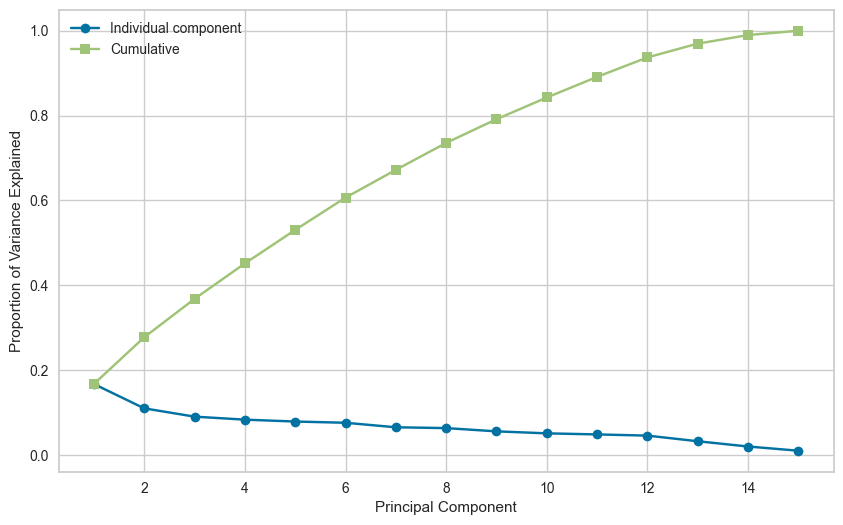

In [58]:
plt.figure(figsize=(10,6))

x_axis = [*range(1, 16, 1)]
plt.plot(x_axis, pca.explained_variance_ratio_, '-o', 
         label='Individual component')
plt.plot(x_axis, np.cumsum(pca.explained_variance_ratio_), 
         '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.legend(loc=2);

From this diagram we learn that around at 45 principle components, the cumulative proportion of variance explained is around 0.9-0.95. Therefore, we will choose this number as the number of components used. 

In [59]:
# Apply PCA to the dataset and transform the data
n_components = 11
pca = PCA(n_components=n_components)
train_PCA = pd.DataFrame(pca.fit_transform(df_scaled), index=df_scaled.index)
train_PCA

,0,1,2,3,4,5,6,7,8,9,10
0,-0.668069,-0.139245,-0.318671,0.429577,-0.764488,1.342347,-0.329421,2.452338,-0.468426,0.371476,0.149658
1,-0.567540,-0.175173,-0.657699,-0.350184,0.637237,-1.006014,0.029603,-0.053881,0.789341,-0.122950,0.495349
2,-0.430716,0.703507,0.047003,-0.503014,0.743097,-0.200855,0.002848,-0.009134,0.513680,0.091910,0.374195
3,-0.580724,0.956299,-0.131490,-0.807864,-0.272246,0.000290,0.052557,-0.139917,-0.473501,0.165734,-0.353159
4,-0.639807,-0.006323,0.264588,0.114069,0.430881,-0.469844,0.010197,-0.098014,-0.117649,0.231867,0.083251
...,...,...,...,...,...,...,...,...,...,...,...
12445,-0.910178,0.426830,-0.347472,-1.622848,0.779459,-1.089845,0.084051,0.304603,0.865852,-0.188450,-0.032121
12446,-0.366869,1.728100,0.626536,-0.920729,0.337607,-0.092015,0.036594,0.105893,0.396913,-0.213955,-0.396665
12447,-0.587086,0.687597,3.141268,0.885813,0.183779,0.491623,-0.095488,-0.076286,-0.429070,0.212835,-0.817413
12448,-0.548900,0.882764,0.134184,-0.453178,0.144878,-0.911179,0.064791,0.037727,0.192829,-0.283898,-0.530368


#### KMeans Clustering

C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

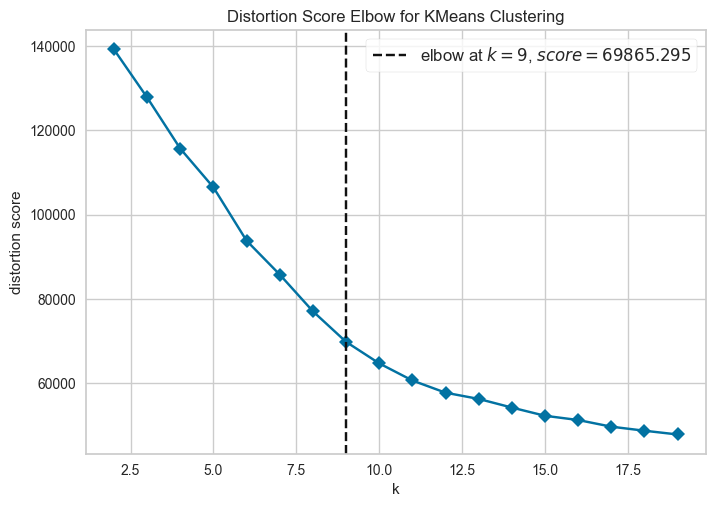

In [60]:
#Create a Kmeans model
model = KMeans(random_state=1)
#run from k=2 to k=20
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(train_PCA)
visualizer.show(); 

C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

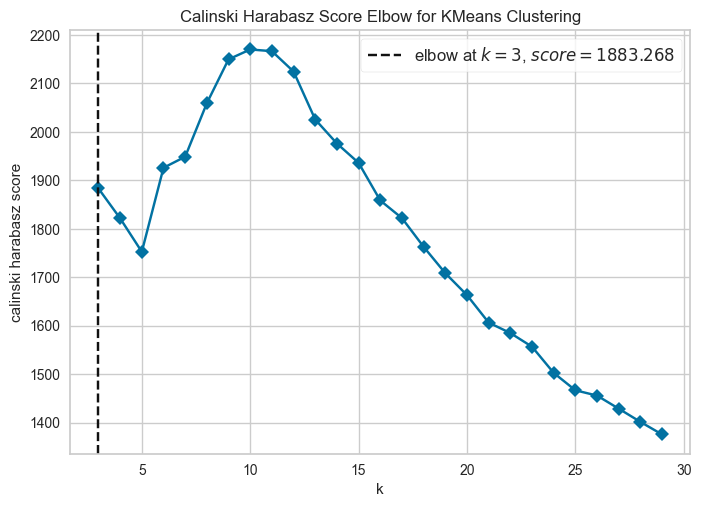

In [61]:
# Run the visualizer again but using the calinski-harabasz scoring metrics
visualizer = KElbowVisualizer(model, k=(3,30), metric='calinski_harabasz', timings=False, locate_elbow=True)
visualizer.fit(train_PCA)
visualizer.show();

As both the Calinsky Harabasz elbow charts indicate that around k=9 there will be the most optimal clustering model, we will determine that as out K. 

C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


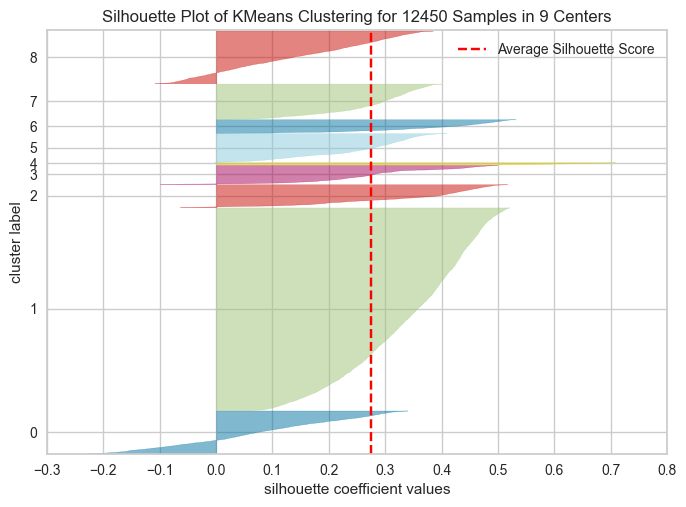

In [62]:
model = KMeans(9, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(train_PCA) 
visualizer.show(); 

In [63]:
model = KMeans(random_state=1,n_clusters=9).fit(train_PCA)
labels = model.labels_
df['label'] = labels
df.head()

C:\Users\Lydia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,NUMPEOPLE,MARKETVAL,RATINGNH,TOTHCAMT,COMDAYS,DRIVEALL,DIST,load,HHGRAD_noHS,NRATE_WORSE_NH,SUBSIDY_None,BUS_YES,SUBWAY_YES,VAN_Yes,DISHH_2.0,label
0,4,271584.0,7.0,1640,5.0,5.0,40.0,0.025325,0,0,0,0,0,0,0,7
1,1,422353.5,8.0,600,5.0,5.0,2.0,0.120870,0,0,0,0,0,0,1,1
2,2,573123.0,8.0,2356,5.0,5.0,16.0,0.044167,0,0,0,0,0,0,1,1
3,4,390743.5,9.0,1440,5.0,5.0,10.0,0.010766,0,0,0,0,0,0,1,1
4,2,208364.0,8.0,2257,5.0,5.0,40.0,0.055640,0,0,0,0,0,0,1,1


### Explore Hierarchical clustering

Source: In class exercise on hiererchical clustering

In [64]:
from sklearn.cluster import AgglomerativeClustering
import scipy as sp
from scipy.cluster.hierarchy import linkage,dendrogram

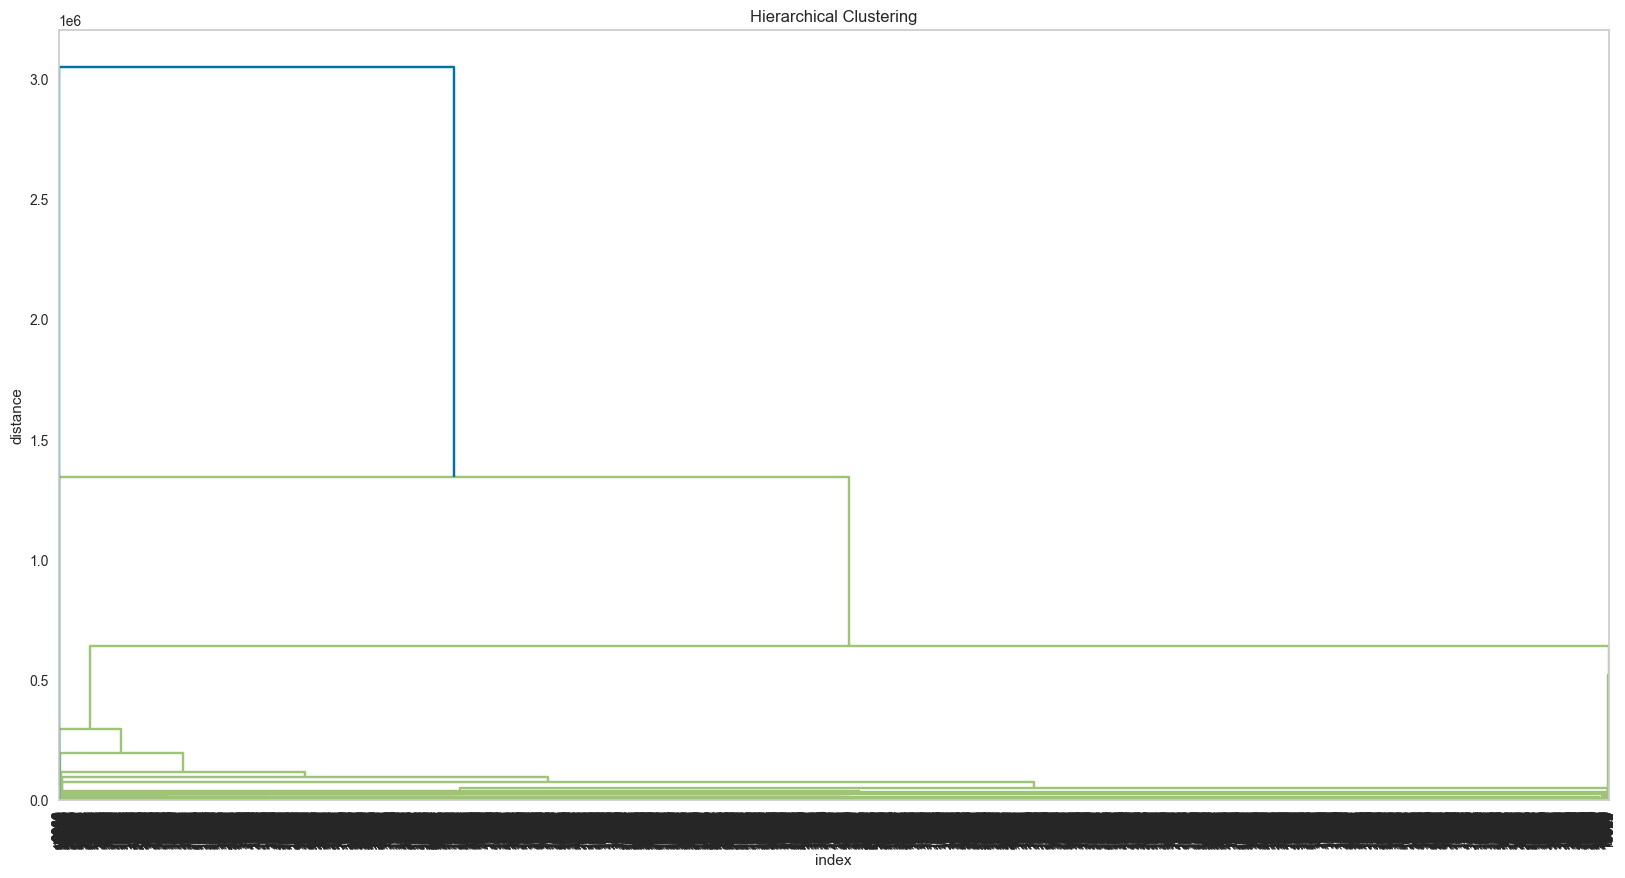

In [65]:
#single
hc=linkage(df.drop('label', axis=1),"single")
plt.figure(figsize=(20,10));
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(False)
dendrogram(hc,leaf_font_size=10);

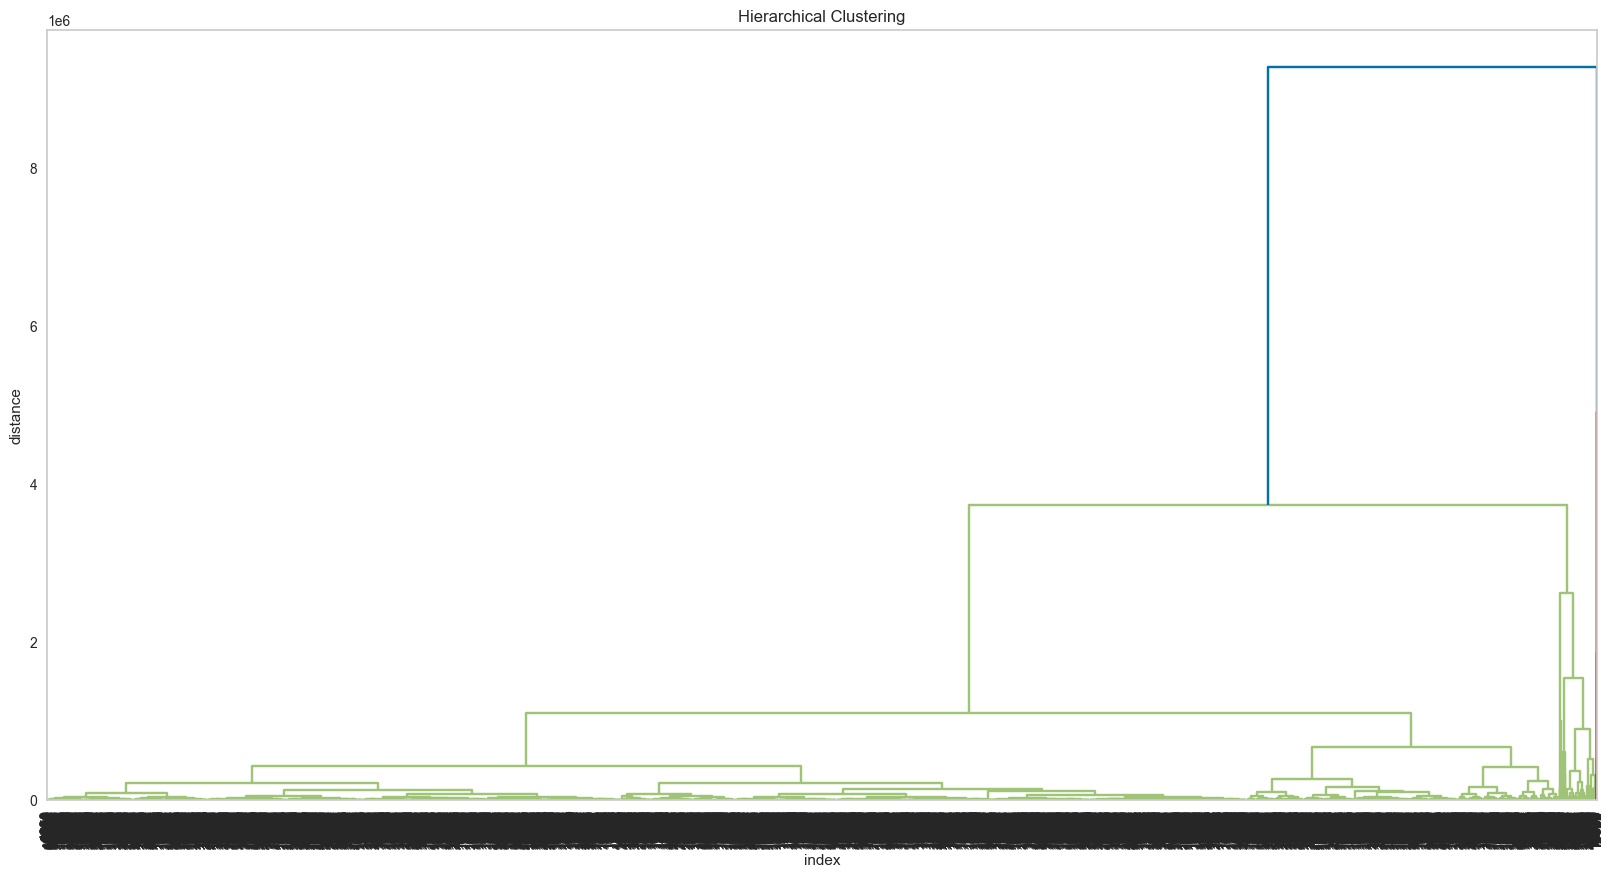

In [66]:
#complete
hc=linkage(df.drop('label', axis=1),"complete")
plt.figure(figsize=(20,10));
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(False)
dendrogram(hc,leaf_font_size=10);

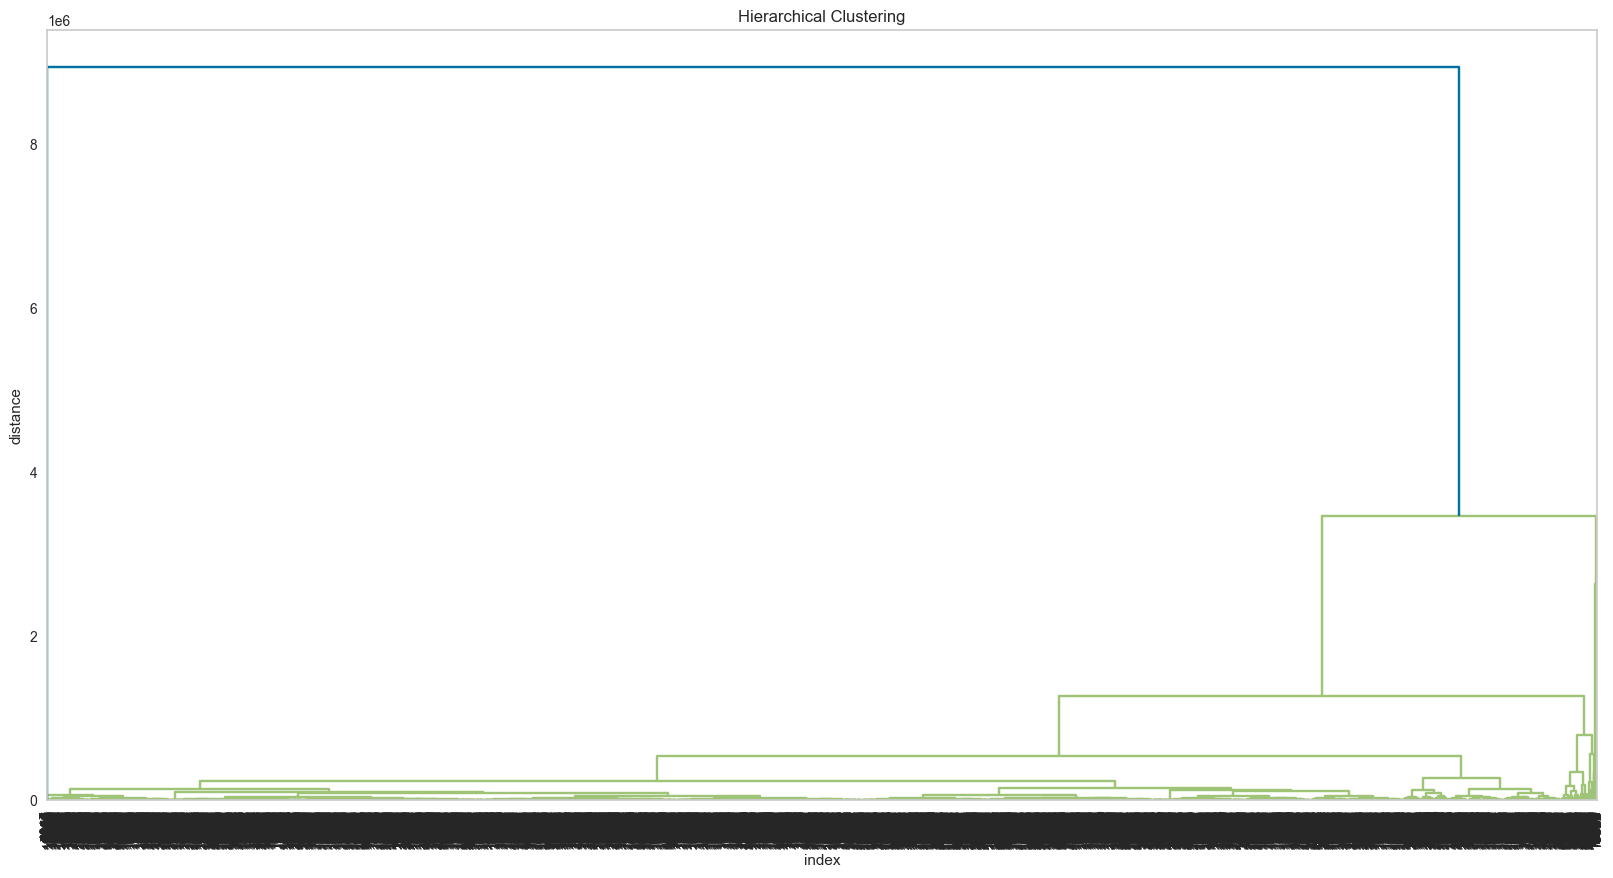

In [67]:
#average
hc=linkage(df.drop('label', axis=1),"average")
plt.figure(figsize=(20,10));
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(False)
dendrogram(hc,leaf_font_size=10);

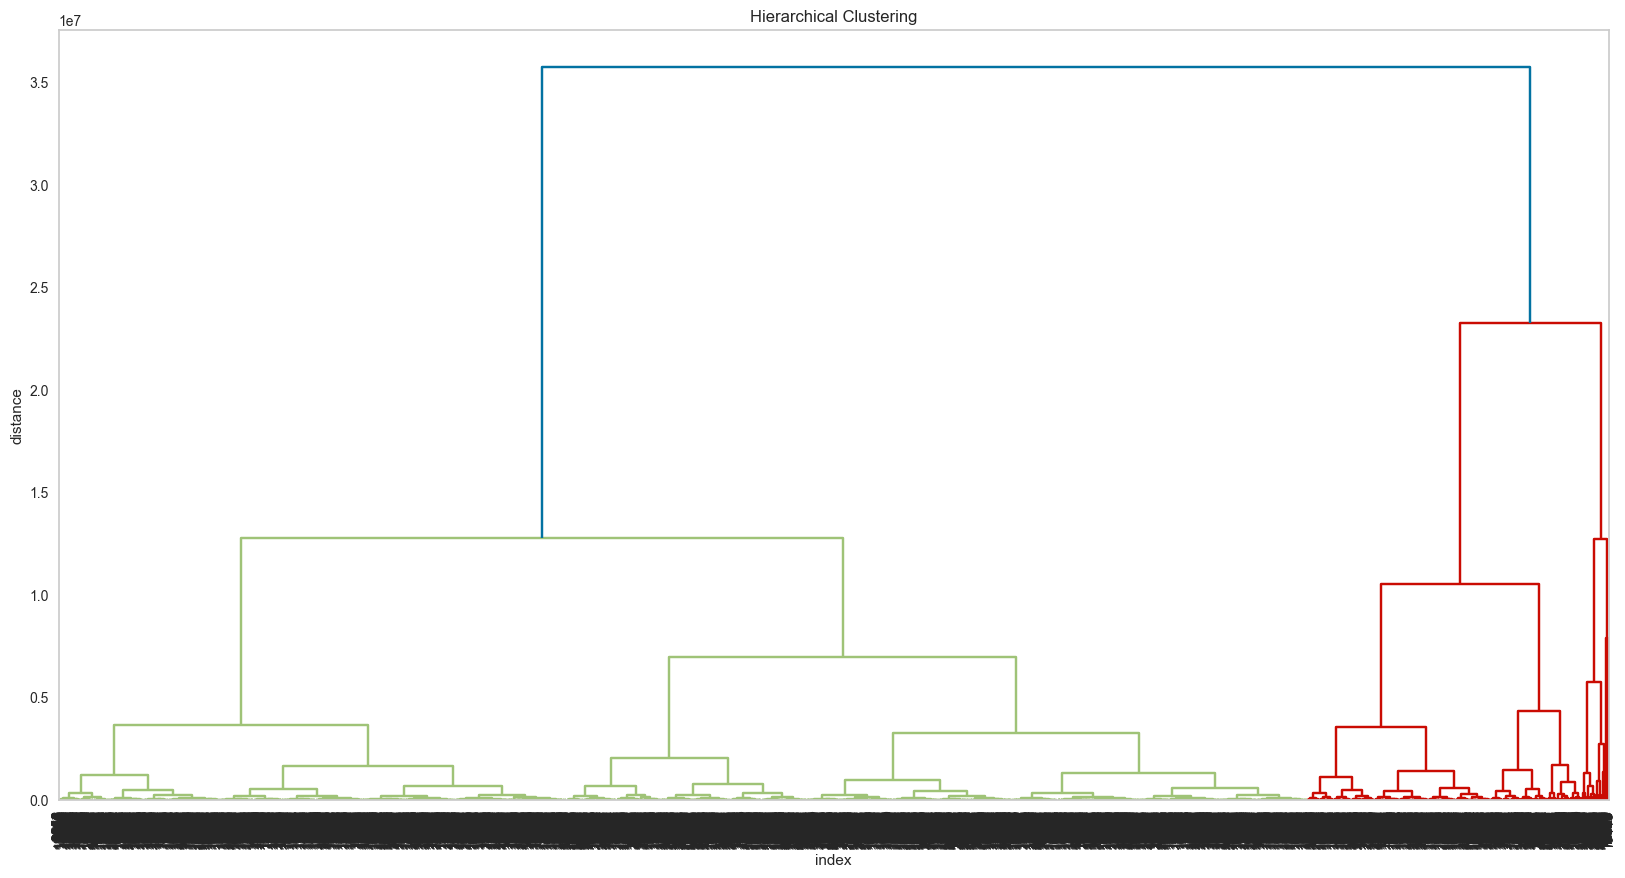

In [68]:
#ward
hc=linkage(df.drop('label', axis=1),"ward")
plt.figure(figsize=(20,10));
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
plt.grid(False)
dendrogram(hc,leaf_font_size=10);

These dendogram demonstrate that all of the data points are very difficult to be fully separated and a good number of clusters to choose will be 3, according to the ward linkage demonstration. The potential reason for this low performance is that the data is too big and encorporates a lot of seemingly unrelated aspect. However, before going back to KMeans, let's visualize our data if we use k=3 as shown in the Ward linkage. 

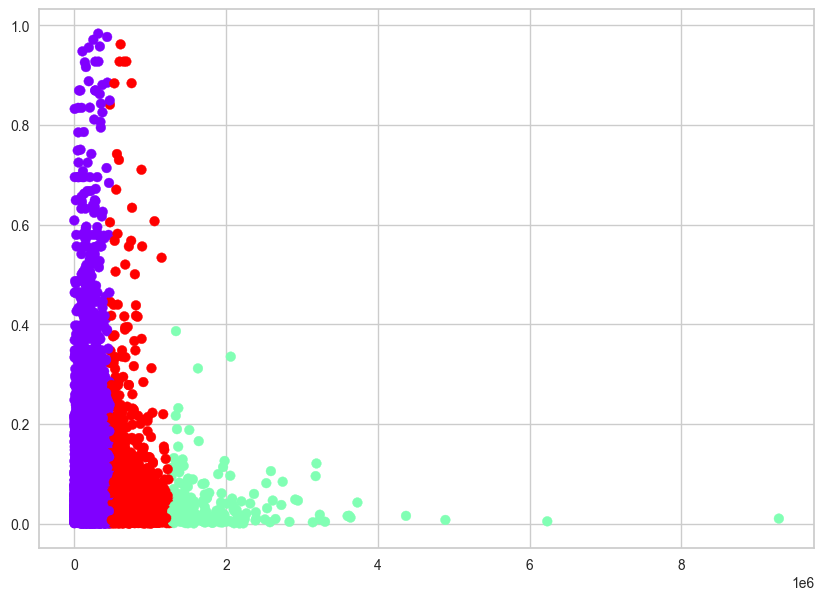

In [69]:
hc=AgglomerativeClustering(n_clusters=3,linkage='ward').fit(df.drop('label', axis=1))
plt.figure(figsize=(10, 7))
plt.scatter(df['MARKETVAL'], df['load'], c=hc.labels_, cmap='rainbow')

In [70]:
from sklearn.metrics import silhouette_score

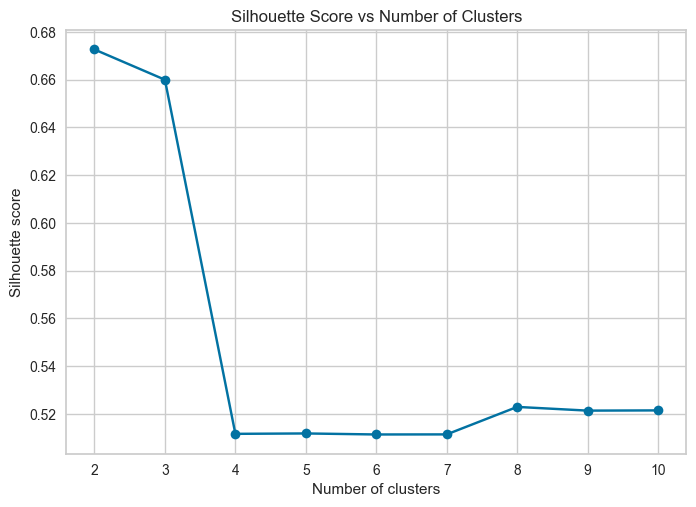

In [71]:
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agg_clustering.fit_predict(df.drop('label', axis=1))
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

As this silhouette score chart indicates decrease in the score as number of cluster increases, this also prove the previous dendograms analysis.

### Visualize and explore the clusters

In this section I will explore and interpret the clusters created by both mechanisms, and try to identify cluster (groups) of houeholds that showcase distinctive features regarding transportation insecurity. 

First let's look at potential distribution of clusters in regard to the 'load' feature

In [73]:
df.head()

,NUMPEOPLE,MARKETVAL,RATINGNH,TOTHCAMT,COMDAYS,DRIVEALL,DIST,load,HHGRAD_noHS,NRATE_WORSE_NH,SUBSIDY_None,BUS_YES,SUBWAY_YES,VAN_Yes,DISHH_2.0,label
0,4,271584.0,7.0,1640,5.0,5.0,40.0,0.025325,0,0,0,0,0,0,0,7
1,1,422353.5,8.0,600,5.0,5.0,2.0,0.120870,0,0,0,0,0,0,1,1
2,2,573123.0,8.0,2356,5.0,5.0,16.0,0.044167,0,0,0,0,0,0,1,1
3,4,390743.5,9.0,1440,5.0,5.0,10.0,0.010766,0,0,0,0,0,0,1,1
4,2,208364.0,8.0,2257,5.0,5.0,40.0,0.055640,0,0,0,0,0,0,1,1


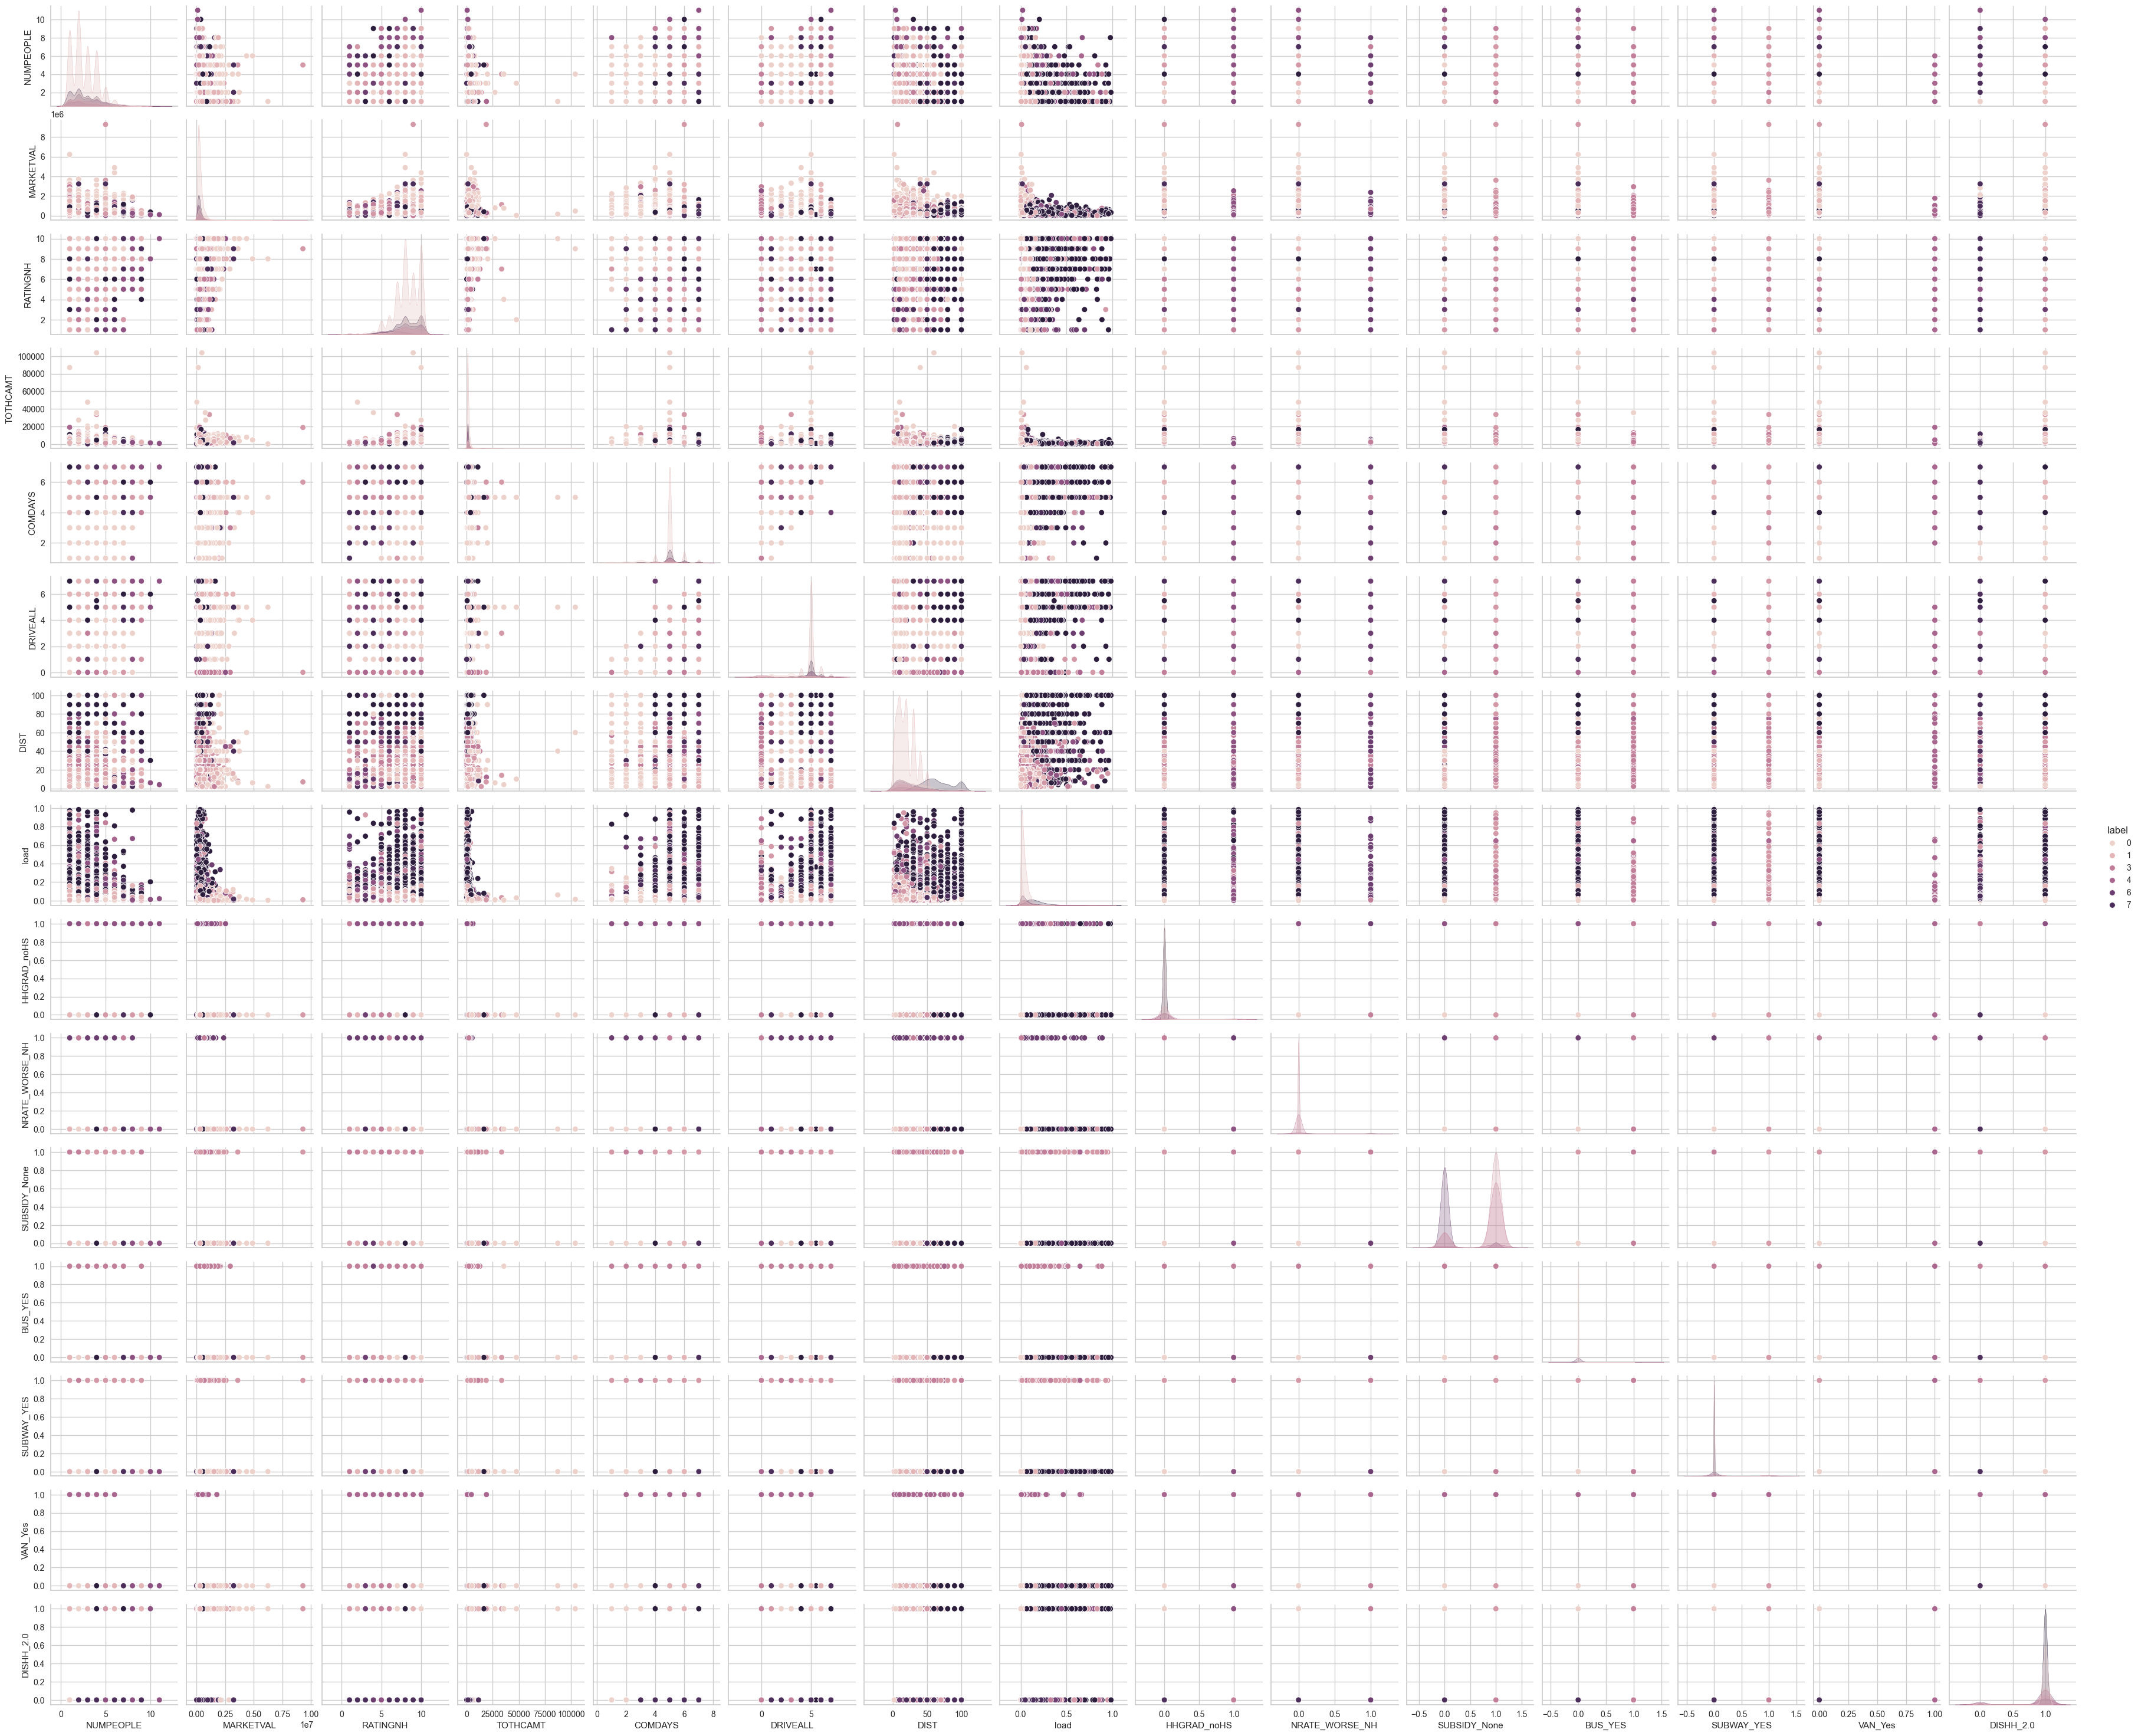

In [75]:
# Let's do a big pairplot of everything to find direction of this section 
sns.pairplot(df, aspect=1.2, height=2, hue='label');

This is a pairplot of all the features in this analysis, colored by the cluster group. We could actually see a lot of interesting patterns from this chart. For example, we can see a relatively intersting separation of clusters in the RatingNH feature (rating of the neighborhood), DISHH (disabled people in houehold). To investigate them further, the below analysis will do the following steps: 
1. Scatter plot analysis to focus on qualitative features distribution and clusters. Features of focus will be TOTHCAMPT (Monthly Total Housing Cost), DIST (distance to work), load (economic trasportation burden), RATINGNH (neighborhood rating), MARKETVAL (market evaluation of the property)
2. Locate distinctive clusters from the above analysis
3. Analyze the characteristics of the cluster (by focusing on the categorical features, which are more transit-infrastructure focused)

#### Step 1: Redo the Pairplot to Focus on Qualitative Feature; Identify Clusters

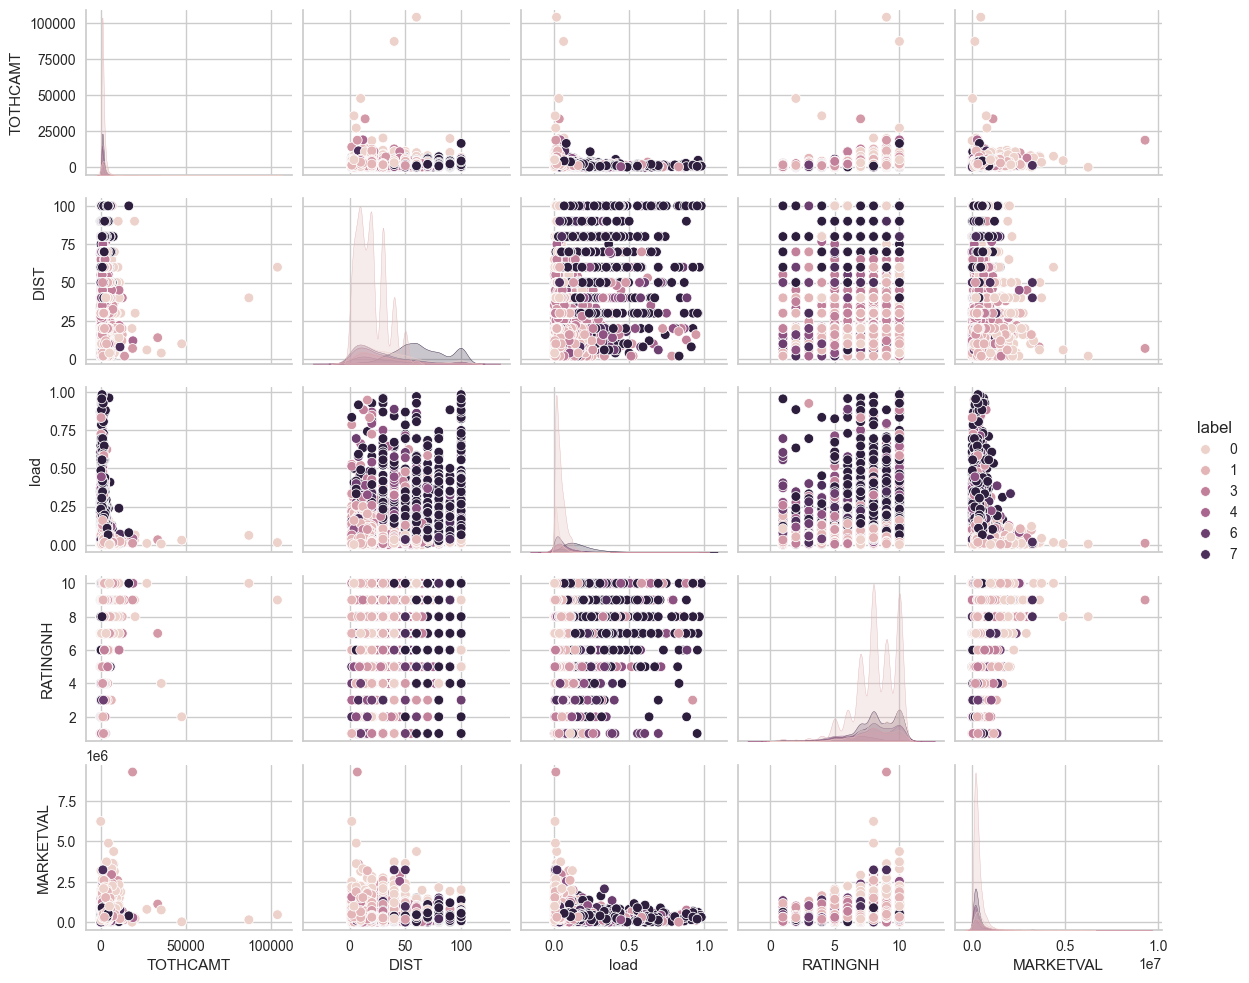

In [78]:
df_small = df[['TOTHCAMT', 'DIST', 'load', 'RATINGNH', 'MARKETVAL','label']]
sns.pairplot(df_small, aspect=1.2, height=2, hue='label');

#### Step 2: Identify Clusters

We can see an interesting separation of the cluster labeled 0 or 1 compared to the cluster 7. For example, cluster 0,1 seem to have a lower DIST, load, slightly higher neighborhood rating. \
The other clusters (3, 4, 5, 6) seem to be a lot smaller in size compared to the former, and don't appear to have significant characteristics by first glance. Let's take a look at them at the end. \
Now we will focus on cluster 0, 1, and 7. 

#### Step 3: Analyze Cluster Characteristics

In [129]:
def summarize_cluster(label): 
    array = []
    for i in label: 
        df1 = df[df['label']==i]
        no_HS_degree_ct = len(df1[df1['HHGRAD_noHS']==1])
        no_transit_subsidy_ct = len(df1[df1['SUBSIDY_None']!=0])
        close_to_bus_ct = len(df1[df1['BUS_YES']==1])
        close_to_subway_ct = len(df1[df1['SUBWAY_YES']==1])
        close_to_van_ct = len(df1[df1['VAN_Yes']==1])
        disabled_in_hh_ct = len(df1[df1['DISHH_2.0']==0])
        mean_house_eval = np.mean(df1['MARKETVAL'])
        mean_monthly_h_cost = np.mean(df1['TOTHCAMT'])
        mean_neighborhood_rating = np.mean(df1['RATINGNH'])
        mean_com_days = np.mean(df1['COMDAYS'])
        mean_com_dist = np.mean(df1['DIST'])
        mean_load = np.mean(df1['load'])
        mean_drive_days = np.mean(df1['DRIVEALL'])

        col = [no_HS_degree_ct,no_transit_subsidy_ct,close_to_bus_ct,close_to_subway_ct,close_to_van_ct,\
                 disabled_in_hh_ct,mean_house_eval,mean_monthly_h_cost,mean_neighborhood_rating,mean_com_days,\
                    mean_com_dist,mean_load,mean_drive_days]
        array.append(col)
        
        print('Cluster ', str(i), ': ')
        print('Number of household with people who do not have highschool degree: ', no_HS_degree_ct)
        print('Number of household that receive transit subsidy: ', no_transit_subsidy_ct)
        print('Number of household that are close to bus: ', close_to_bus_ct)
        print('Number of household that are close to subway: ', close_to_subway_ct)
        print('Number of household that are close to van: ', close_to_van_ct)
        print('Number of household that have disabled people in houe: ', disabled_in_hh_ct)
        print('Average market evaluation price of property: ', mean_house_eval)
        print('Average neighborhood rating: ', mean_neighborhood_rating)
        print('Average household monthly housing cost: ', mean_monthly_h_cost)
        print('Average commute days: ', mean_com_days)
        print('Average number of days driving to work: ', mean_drive_days)
        print('Average commute distance: ', mean_com_dist)
        print('Average economic commute burden: ', mean_load)
        print('  ')
    index_name = ['Number of household with people who do not have highschool degree','Number of household that receive transit subsidy','Number of household that are close to bus','Number of household that are close to subway','Number of household that are close to van',\
                 'Number of household that have disabled people in houe','Average market evaluation price of property','Average household monthly housing cost','Average neighborhood rating','Average commute days',\
                    'Average commute distance','Average economic commute burden','Average number of days driving to work']
    summary = pd.DataFrame(array, index=label, columns = index_name).transpose()
    
    return summary

In [131]:
summarize_cluster(range(8))

Cluster  0 : 
Number of household with people who do not have highschool degree:  6
Number of household that receive transit subsidy:  0
Number of household that are close to bus:  1
Number of household that are close to subway:  2
Number of household that are close to van:  0
Number of household that have disabled people in houe:  34
Average market evaluation price of property:  534201.2485678693
Average neighborhood rating:  8.539732494099134
Average household monthly housing cost:  2483.5727773406766
Average commute days:  3.1526357199055863
Average number of days driving to work:  2.3988985051140834
Average commute distance:  31.525439286650926
Average economic commute burden:  0.026118111917000815
  
Cluster  1 : 
Number of household with people who do not have highschool degree:  0
Number of household that receive transit subsidy:  0
Number of household that are close to bus:  0
Number of household that are close to subway:  0
Number of household that are close to van:  0
Number 

,0,1,2,3,4,5,6,7
Number of household with people who do not have highschool degree,6.000000,0.000000,34.000000,71.000000,5.000000,851.000000,27.000000,0.000000
Number of household that receive transit subsidy,0.000000,0.000000,580.000000,459.000000,44.000000,0.000000,25.000000,0.000000
Number of household that are close to bus,1.000000,0.000000,0.000000,564.000000,16.000000,0.000000,11.000000,0.000000
Number of household that are close to subway,2.000000,0.000000,676.000000,201.000000,17.000000,0.000000,20.000000,1.000000
Number of household that are close to van,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
Number of household that have disabled people in houe,34.000000,0.000000,50.000000,79.000000,7.000000,124.000000,57.000000,1048.000000
Average market evaluation price of property,534201.248568,310846.803392,435099.231252,430094.913248,419191.023810,254049.541970,303971.764201,286937.818720
Average household monthly housing cost,2483.572777,1546.162617,1995.047337,1453.182624,2073.971429,1077.213866,1220.650873,1392.340649
Average neighborhood rating,8.539732,8.215712,8.199704,7.776596,7.871429,8.102233,5.912718,8.028626
Average commute days,3.152636,5.082723,4.803254,4.833333,4.728571,5.084606,4.935162,4.765267


#### Analysis

From the above clustering, we could actually pinpoint clusters that represent a certain demographics. 

1. Cluster 0: the wealthier population, showcased by the highest property values, highest neighborhood rating also highest monthy cost. It is also noteworthy that this group also has the longest averate commute distance, while also having the lowest economic commute burden, potentially due to a relatively low average commute days (3.15) and their overall higher income level. 
2. Cluster 1: this group's demograhics information appears to be very similar to an average level. One noteworthy metric is its low commute distance and high number of days of driving to work. Therefore, it is likely that this group represents lower-middle-income households living in suburban areas close to their employment centers. And potentially younger generation 9-5ers. 
3. Cluster 2: This group's demographics appears also to be very similar to an average. The most noteworthy metric is the high number of people who receive transit subsity as well as the number of households close to subway stations. This group also has a low number of days of driving to work. The group most likely represent middle-income houeholds in the urban areas. This can be an evidence of the benefits and effectivenss of transit subsidy. 
4. Cluster 3: Very similar to cluster 2. The only difference is that this cluster also include people who are close to bus. As a result of proximity to both bus and subway, this group has an average number of driving days of 1, the lowest in all clusters. 
5. Cluster 4: This group doesn't have any noteworthy characteristics. 
6. Cluster 5: This group could represent a lower-education and lower-income population. This group has a total of 851 households with people who don't have highschool degree, has the lowest property value, the most commute days (more than 5 which means some work over weekends), a high economic commute burden (4 times of cluster 0) and also high driving days (nearly 5 days). Note that this group also has 0 household that is close to any public transportation. This group is likely to be suffering from transportation insecurity, which could be the result of many socio-economic factors. 
7. Cluster 6: This group is noted by its highest average economic commute burden and the lowest average neighborhood rating of all clusters. Dispite that the other transit and demographics metrics of this cluster are close to average level, this cluster is the proof that neighborhood can be crucial in determining people's connectedness. 
8. Cluster 7: This group is noted by the highest number of disabled people in house. However, the transportation metrics of this group are close to the average level (group 4 and 6), indicating that while those households have disabled people, this group can still generate move around effectively with cars. However, we can note that this group almost has no houehold near any public transportation, which could be a sign that driving remains the most effective way of transportation for people with disability. 